In [1]:
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import corner

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("../../../data/twinkles_observation_history.csv")

In [4]:
# row 0 g
# row 2 z
# row 3 r
# row 13 y
# row 29 i
observation = [df[0:1], df[2:3], df[3:4], df[50:51], df[68:69]]
print observation

[   obsHistID        expMJD filter   FWHMeff  fiveSigmaDepth
0     183767  59823.286523      g  1.093153       24.377204,    obsHistID        expMJD filter   FWHMeff  fiveSigmaDepth
2     184047  59823.418685      z  0.908511       21.923566,    obsHistID        expMJD filter   FWHMeff  fiveSigmaDepth
3     185595  59825.256044      r  0.949096       24.128617,     obsHistID        expMJD filter   FWHMeff  fiveSigmaDepth
50     217577  59874.157263      u  0.972417       23.277217,     obsHistID        expMJD filter   FWHMeff  fiveSigmaDepth
68     261993  59944.150962      i  0.570036       23.740418]


In [5]:
db = om10.DB(vb=False)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

<type 'numpy.ndarray'>
[[59823.286523 'g' 1.093153 24.377204000000003]
 [59823.307263999995 'g' 1.23193 24.289872]
 [59823.418685000004 'z' 0.9085110000000001 21.923566]
 ..., 
 [63220.059298 'r' 1.2263629999999999 23.849110999999997]
 [63229.170250999996 'y' 0.784904 21.740602]
 [63229.172944000005 'y' 0.7890590000000001 21.733021]]


In [6]:
#%%timeit
#import numpy as np
#curr_obs = df.loc[[0]].as_matrix()[0]
#curr_obs = np.delete(curr_obs, 0)
#print curr_obs
#realizer.make_catalog_for_corner(curr_obs)

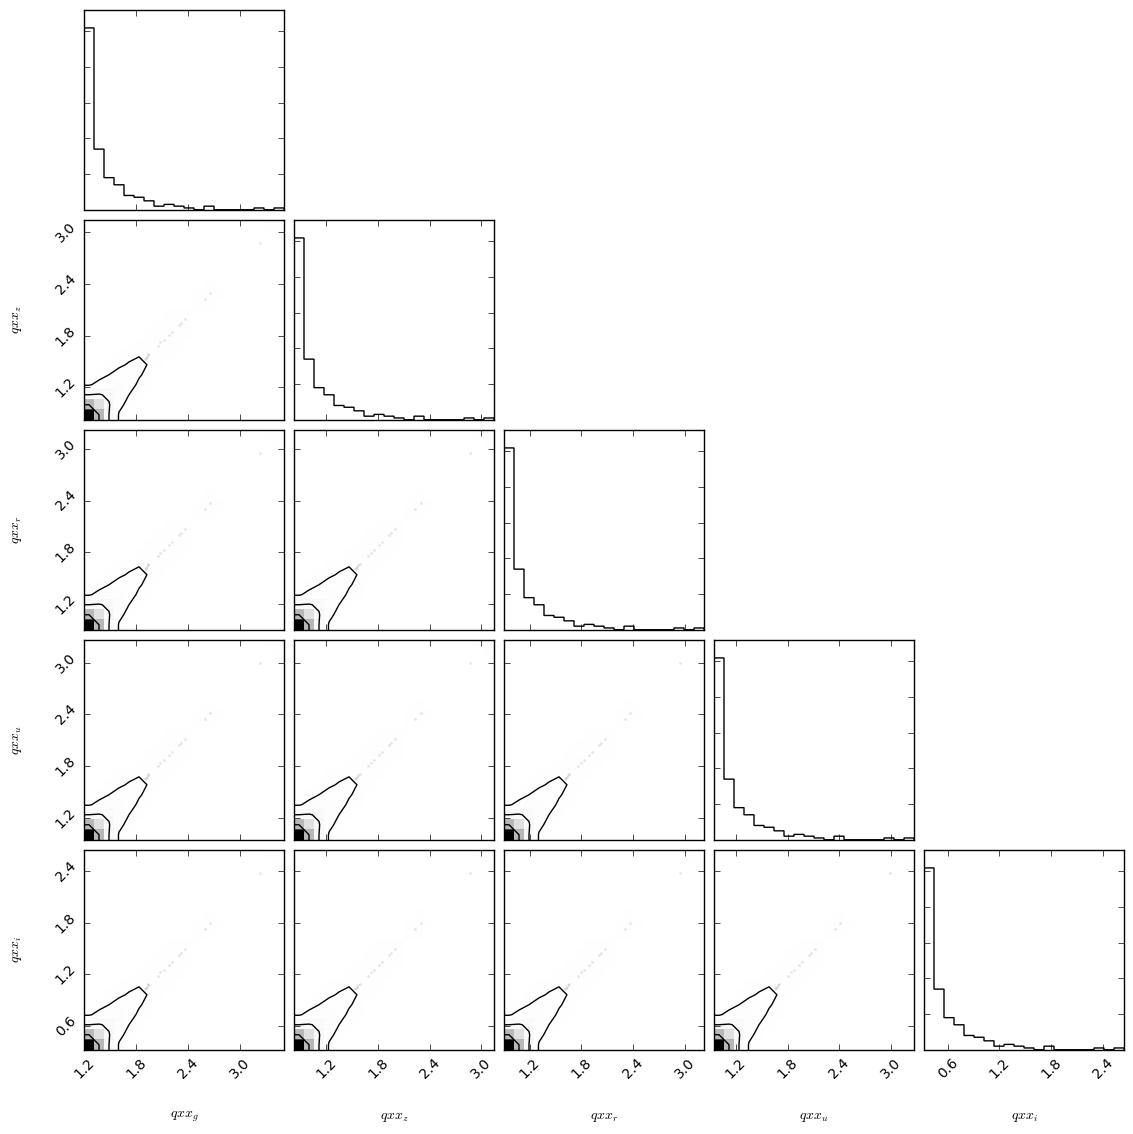

In [7]:
#%%timeit
#import numpy as np
#observation = [np.delete(df.loc[[0]].as_matrix()[0], 0), np.delete(df.loc[[2]].as_matrix()[0], 0), np.delete(df.loc[[3]].as_matrix()[0], 0),
# np.delete(df.loc[[50]].as_matrix()[0], 0), np.delete(df.loc[[68]].as_matrix()[0], 0)]
#print observation
fig =  realizer.generate_cornerplot()
import matplotlib.pyplot as plt
plt.show(fig)
#realizer.make_catalog_for_corner(observation)